## Setup

In [1]:
import torch
from torch import nn, optim, utils
import matplotlib.pyplot as plt

torch.__version__

'2.0.1'

## Generating data

In [2]:
# New Parameters
volume = 0.8
bias = 0.2

# Creating data
start = 0
end = 1
step = 0.025
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = volume * x + bias

In [3]:
# Create Splits
train_split = int(0.7 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

In [4]:
def plot_predictions(
    input_data=x_train,
    input_labels=y_train,
    test_data=x_test,
    test_labels=y_test,
    predictions=None,
):
    plt.figure(figsize=(10, 10))
    plt.scatter(input_data, input_labels, c="g", s=6, label="Training Data")
    plt.scatter(test_data, test_labels, c="y", s=6, label="Test Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=6, label="Predictions")

    plt.legend(prop={"size": 12})
    plt.show()

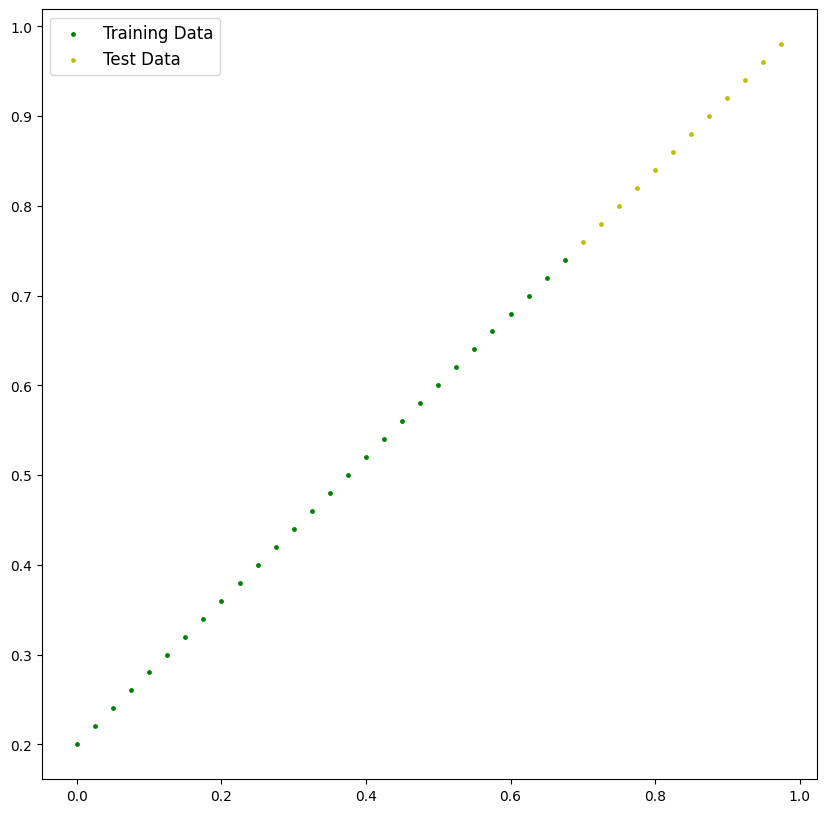

In [5]:
plot_predictions()

## Model Creation

In [6]:
class LinealRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.volume = nn.Parameter(
            torch.randn(1, dtype=torch.float), requires_grad=True
        )
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.volume * x + self.bias

In [7]:
torch.manual_seed(1992)

model = LinealRegressor()

In [8]:
model.state_dict()

OrderedDict([('volume', tensor([-0.3904])), ('bias', tensor([-0.5537]))])

In [9]:
with torch.inference_mode():
    y_pred = model(x_test)

In [10]:
y_pred.dtype

torch.float32

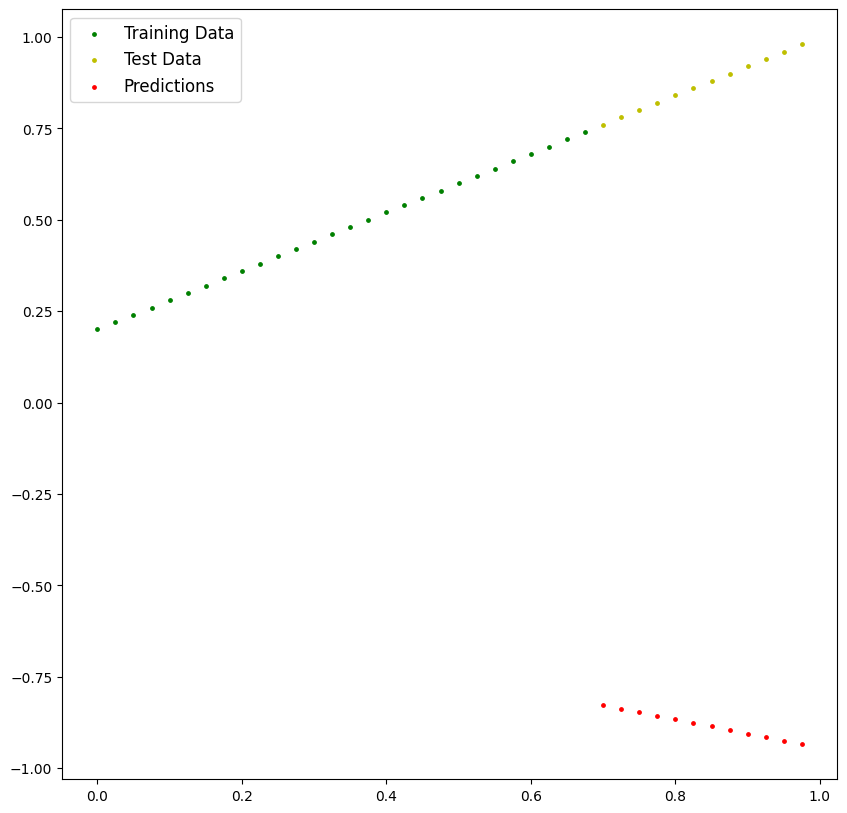

In [11]:
plot_predictions(predictions=y_pred)

## Loss Function and Optimizers in PyTorch

In [12]:
loss_fn = torch.nn.HuberLoss()

optimizer = optim.SGD(params=model.parameters(), lr=0.01)

In [13]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [14]:
torch.manual_seed(1992)

epochs = 5000
training_loss = []
testing_loss = []

# Training
for epoch in range(epochs):
    model.train()
    # Make predictions
    y_pred = model(x_train)
    # Calculate the loss
    loss = loss_fn(y_pred, y_train)
    # Calculate the grad
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validate the model
    model.eval()
    with torch.inference_mode():
        test_pred = model(x_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 100 == 0:
            training_loss.append(loss.detach().numpy())
            testing_loss.append(test_loss.detach().numpy())
            print(
                f"Epoch: {epoch} | Train Loss: {loss:.2f} | Test Loss: {test_loss:.2f}"
            )

Epoch: 0 | Train Loss: 0.66 | Test Loss: 1.24
Epoch: 100 | Train Loss: 0.09 | Test Loss: 0.36
Epoch: 200 | Train Loss: 0.02 | Test Loss: 0.14
Epoch: 300 | Train Loss: 0.01 | Test Loss: 0.09
Epoch: 400 | Train Loss: 0.01 | Test Loss: 0.07
Epoch: 500 | Train Loss: 0.01 | Test Loss: 0.06
Epoch: 600 | Train Loss: 0.01 | Test Loss: 0.06
Epoch: 700 | Train Loss: 0.01 | Test Loss: 0.05
Epoch: 800 | Train Loss: 0.01 | Test Loss: 0.05
Epoch: 900 | Train Loss: 0.01 | Test Loss: 0.04
Epoch: 1000 | Train Loss: 0.01 | Test Loss: 0.04
Epoch: 1100 | Train Loss: 0.01 | Test Loss: 0.04
Epoch: 1200 | Train Loss: 0.01 | Test Loss: 0.04
Epoch: 1300 | Train Loss: 0.01 | Test Loss: 0.03
Epoch: 1400 | Train Loss: 0.01 | Test Loss: 0.03
Epoch: 1500 | Train Loss: 0.00 | Test Loss: 0.03
Epoch: 1600 | Train Loss: 0.00 | Test Loss: 0.03
Epoch: 1700 | Train Loss: 0.00 | Test Loss: 0.02
Epoch: 1800 | Train Loss: 0.00 | Test Loss: 0.02
Epoch: 1900 | Train Loss: 0.00 | Test Loss: 0.02
Epoch: 2000 | Train Loss: 0.00 |

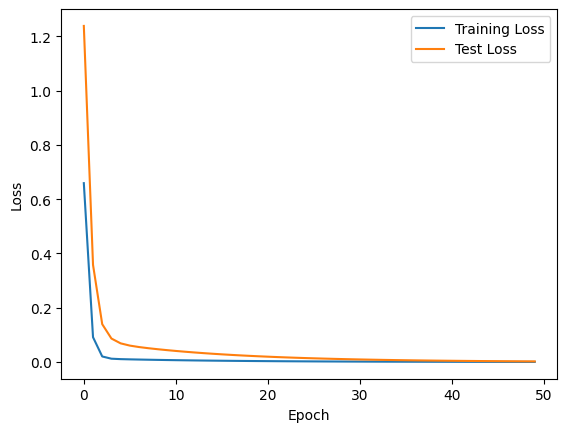

In [15]:
plt.plot(training_loss, label="Training Loss")
plt.plot(testing_loss, label="Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

## Inference with the Model

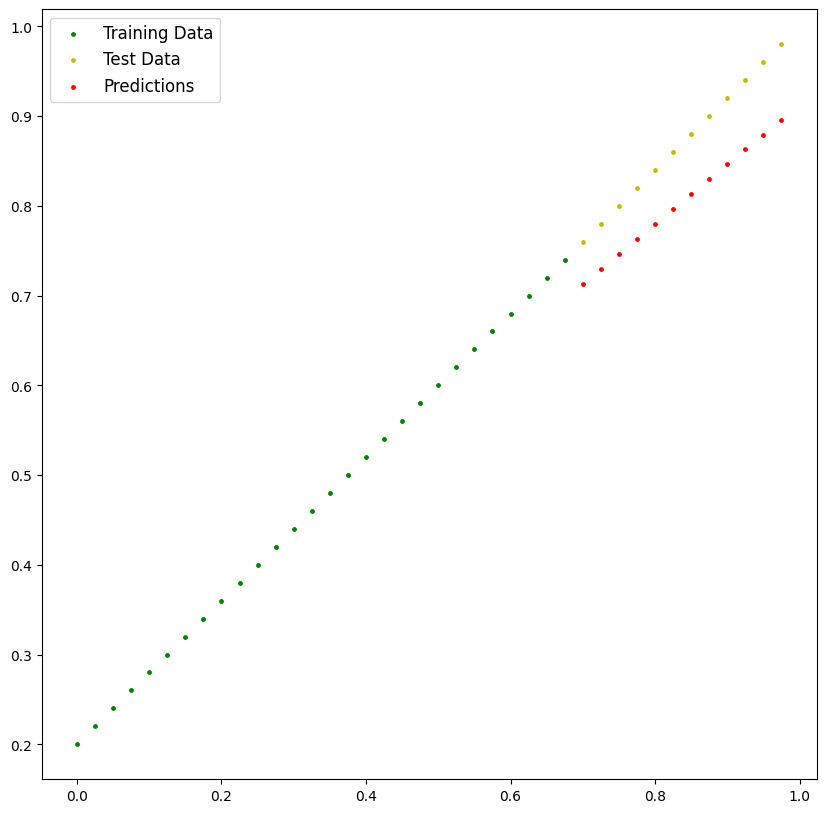

In [16]:
model.eval()

with torch.inference_mode():
    model.to("cpu")
    x_test = x_test.to("cpu")
    y_pred = model(x_test)

plot_predictions(predictions=y_pred.detach().numpy())